In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [ ]:
!pip install -U scikit-learn

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns

In [86]:
df = pd.read_csv('./Churn_Modelling.csv')

In [87]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
df.shape

(10000, 14)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [90]:
df.duplicated().sum()

0

In [91]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [92]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [93]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [94]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [95]:
df.drop(columns=["RowNumber",'CustomerId','Surname'],inplace=True)

In [96]:
df.head()                  

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [99]:
train_df = df.sample(frac=0.8, random_state=1)
test_df = df.drop(train_df.index)

In [100]:
X_train_features = train_df.copy()
X_test_features = test_df.copy()

y_train = X_train_features.pop('Exited')
y_test = X_test_features.pop('Exited')

In [101]:
y_train.shape

(8000,)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train_features)
X_test_features = scaler.transform(X_test_features)

In [104]:
X_train_features

array([[-1.04951963,  0.78091929, -1.04812816, ..., -0.5821616 ,
        -0.57735027,  0.91416872],
       [ 0.29499903, -0.46584705, -0.70245371, ..., -0.5821616 ,
        -0.57735027,  0.91416872],
       [-1.24602621,  0.30139377, -1.04812816, ..., -0.5821616 ,
        -0.57735027, -1.09388997],
       ...,
       [-1.48390259,  2.41130604, -1.04812816, ..., -0.5821616 ,
        -0.57735027, -1.09388997],
       [ 1.14308003,  0.68501419,  0.33456967, ...,  1.71773609,
        -0.57735027,  0.91416872],
       [ 1.24650455, -1.52080318, -1.04812816, ..., -0.5821616 ,
        -0.57735027,  0.91416872]])

In [105]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [106]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [107]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 11)                132       
                                                                 
 dense_15 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [109]:
history = model.fit(X_train_features, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 7ms/step - loss: 0.5434 - accuracy: 0.7644 - val_loss: 0.4817 - val_accuracy: 0.8044
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4536 - accuracy: 0.8084 - val_loss: 0.4436 - val_accuracy: 0.8044
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4288 - accuracy: 0.8242 - val_loss: 0.4301 - val_accuracy: 0.8062
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4177 - accuracy: 0.8327 - val_loss: 0.4227 - val_accuracy: 0.8144
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4094 - accuracy: 0.8364 - val_loss: 0.4175 - val_accuracy: 0.8181
Epoch 6/100
200/200 [==============================] - 2s 10ms/step - loss: 0.4016 - accuracy: 0.8395 - val_loss: 0.4115 - val_accuracy: 0.8231
Epoch 7/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3939 - accuracy: 0.8431 - val_loss: 0.4004 - val_accuracy: 0.830

In [81]:
model.layers[0].get_weights()

[array([[-0.03210757, -0.10511161, -0.09626953,  0.10739681, -0.0992837 ,
         -0.34635726, -0.07041735,  0.13461646, -0.13926132,  0.02203275,
         -0.3295648 ],
        [ 0.54417586, -0.60935926,  0.8585324 , -0.05833811,  0.7814828 ,
          0.09262023, -0.11082016,  0.05910654, -0.802474  ,  0.06842716,
         -0.08836348],
        [-0.04102   , -0.35737994,  0.00764638, -0.08788771, -0.14210674,
          0.19442682,  0.06608521,  0.25913718,  0.3392647 , -0.12245607,
          0.289021  ],
        [-0.2903408 , -0.27009085, -0.05505567,  0.17610261, -0.5541352 ,
          0.36567622,  1.4158463 ,  0.5584321 , -0.1708933 ,  0.02362663,
         -0.79632664],
        [-0.13143529,  0.26727188,  0.9906513 ,  0.872349  , -0.9430417 ,
          1.3747163 , -0.18638492,  0.2509796 , -0.33424336,  0.49812838,
          0.01592416],
        [ 0.11088271, -0.38509893, -0.07105634,  0.13271432,  0.06937484,
         -0.00293748,  0.13009268,  0.43356955,  0.28088507,  0.3536109

In [82]:
y_log = model.predict(X_test_features)

63/63 [==============================] - 0s 3ms/step


In [83]:
y_pred = np.where(y_log > 0.5,1,0)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.866

In [110]:
import matplotlib.pyplot as plt

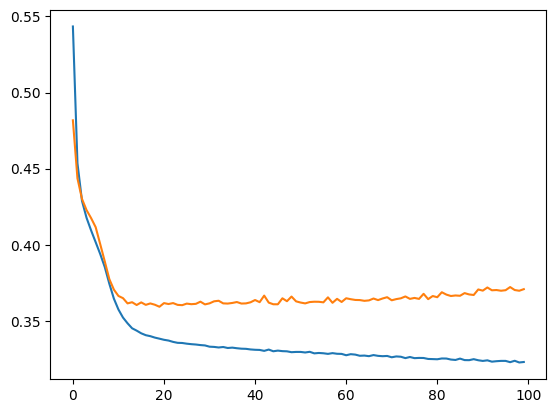

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

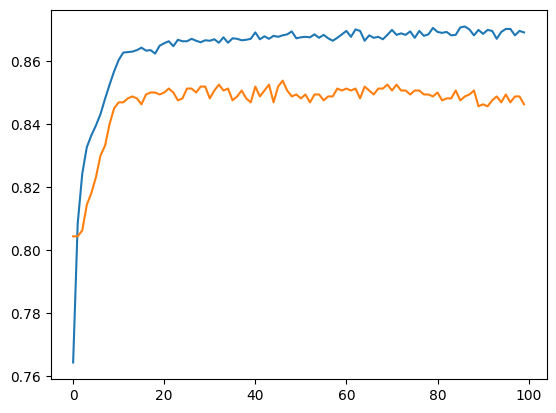

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])